## A DistilBERT-based Technique of Sentiment Analysis for Movie Reviews

### This is a transfer learning approach to a sentiment analysis problem. In this project, I did a sentiment analysis of the IMDB dataset using transfer learning and implemented same with some Deep learning approaches and then compared the results. This was done as part of my MSc -AI module submitted to the University of Hull

### Data Import and preprocessing

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Importing essential libraries and functions

In [ ]:
# Importing essential libraries and functions
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, SpatialDropout1D,SimpleRNN
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from textblob import Word

In [ ]:
#!pip list

In [ ]:
#Import stopwords from NLTK
import nltk
nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Import the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")



Mounted at /content/gdrive


In [ ]:
# Importing IMDb Movie Reviews dataset

import pandas as pd
imdb_data=pd.read_csv('/content/gdrive/MyDrive/IMDB Dataset.csv')


### Data Prepocessing

In [ ]:
import re

imdb_data['review'] = imdb_data['review'].apply(lambda x:x.replace('<br /><br />', ''))
imdb_data['review'] = imdb_data['review'].apply(lambda x:x.replace("'s", ''))

def preprocess(text):
    #removes all sprecial characters and extra white spaces and converts to lower case
    
    return re.sub(r'[\\\\/:*%^&*!"|.,;)(]','',text.lower().strip())


In [ ]:
#clean review

imdb_data['review']= imdb_data['review'].apply(preprocess)
imdb_data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there a family where a little boy ja...,negative
4,petter mattei love in the time of money is a v...,positive
5,probably my all-time favorite movie a story of...,positive
6,i sure would like to see a resurrection of a u...,positive
7,this show was an amazing fresh innovative ide...,negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


### Visualize the distribution

In [ ]:
#!pip install seaborn

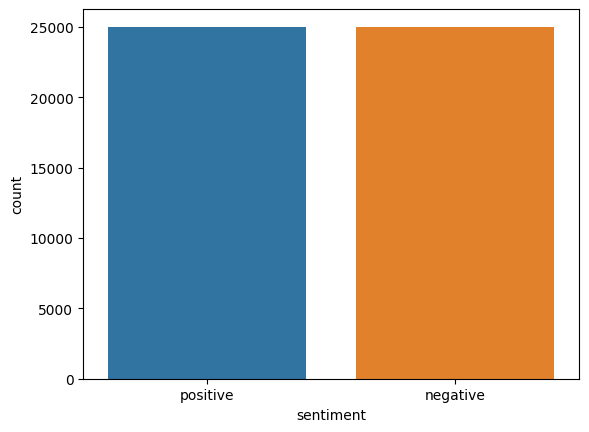

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data= imdb_data,x=imdb_data['sentiment'])
plt.show()

### Remove Stopwords

In [ ]:
# Define a function to remove stop words from a single review
def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [ ]:
# Apply the remove_stopwords function to the 'review' column
imdb_data['review'] = imdb_data['review'].apply(remove_stopwords)

# View the updated dataframe
print(imdb_data.head())

                                              review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically family little boy jake thinks zombie...  negative
4  petter mattei love time money visually stunnin...  positive


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Lemmatization- to make words the base words
imdb_data['review'] = imdb_data['review'].apply(lambda x:
                                                ' '.join([Word(x).lemmatize() for x in x.split()]))
print(imdb_data.head())

                                              review sentiment
0  one reviewer mentioned watching 1 oz episode '...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically family little boy jake think zombie ...  negative
4  petter mattei love time money visually stunnin...  positive


### Convert the target variable to numeric

In [ ]:
# Converting sentiment labels to 0 & 1

y = imdb_data['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X = list(imdb_data['review'])


In [ ]:
X[1]

"wonderful little production filming technique unassuming- old-time-bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen- michael sheen got polari voice pat truly see seamless editing guided reference williams ' diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional 'dream ' technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done"

### Split the dataset into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


### Tokenize the Dataset

In [ ]:
# Embedding layer expects the words to be in numeric form 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
#get the number of vocabulary in the dataset
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

159015

In [ ]:
X_train[1]

[34,
 329,
 1,
 20,
 34,
 329,
 1,
 2097,
 168,
 67,
 205,
 208,
 1301,
 151,
 421,
 67,
 378,
 524,
 3004,
 30676,
 5,
 3671,
 1,
 1500,
 550,
 11558,
 12264,
 1891,
 1500,
 289,
 3671,
 17880,
 187,
 11558,
 12264,
 238,
 129,
 152,
 11,
 162,
 219,
 39,
 96,
 1106,
 594,
 1208,
 14458,
 11558,
 4,
 16,
 78,
 11558,
 240,
 11118,
 337,
 3111,
 16702,
 545,
 5860,
 53,
 492,
 1927,
 1208,
 14458,
 582,
 20057,
 18,
 156,
 524,
 81,
 7348,
 107,
 10,
 16,
 1172,
 601,
 45843,
 411,
 18,
 3475,
 118,
 466,
 424,
 16,
 1558,
 104,
 293,
 3723,
 1376,
 1922,
 295,
 8,
 75,
 18521,
 8,
 2113,
 2282,
 411,
 418,
 8,
 45,
 12836,
 11558,
 113,
 60,
 318,
 4023,
 10743,
 1702,
 289,
 1530,
 219,
 38479,
 1208,
 163,
 666,
 8,
 42,
 15,
 9702,
 8,
 1,
 515,
 4493,
 970,
 6355,
 442,
 173,
 1530,
 219,
 104,
 16,
 3,
 601,
 6624,
 299,
 348,
 130,
 941,
 1,
 20,
 1634,
 3,
 3,
 34]

### Pad the sentences for equal length

In [ ]:
# Padding all reviews to fixed equal length

maxlen = 512

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

### Model A: RNN

In [ ]:
#Define the Model

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(vocab_length, output_dim=5, input_length=maxlen))
rnn_model.add(SimpleRNN(32,  return_sequences= False))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(10, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))


In [ ]:
#Model compile
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 5)            795075    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1216      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 796,632
Trainable params: 796,632
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3) #Introduced to avoid overfitting
history = rnn_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
1250/1250 [==============================] - 512s 404ms/step - loss: 0.5222 - accuracy: 0.7055 - val_loss: 0.3522 - val_accuracy: 0.8493
Epoch 2/10
1250/1250 [==============================] - 408s 326ms/step - loss: 0.2948 - accuracy: 0.8856 - val_loss: 0.3177 - val_accuracy: 0.8702
Epoch 3/10
1250/1250 [==============================] - 394s 315ms/step - loss: 0.2018 - accuracy: 0.9263 - val_loss: 0.3705 - val_accuracy: 0.8607
Epoch 4/10
1250/1250 [==============================] - 392s 313ms/step - loss: 0.1349 - accuracy: 0.9538 - val_loss: 0.3722 - val_accuracy: 0.8650
Epoch 5/10
1250/1250 [==============================] - 377s 301ms/step - loss: 0.1038 - accuracy: 0.9648 - val_loss: 0.5602 - val_accuracy: 0.8379


In [ ]:
score = rnn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 13s 42ms/step - loss: 0.5602 - accuracy: 0.8379


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5601624846458435
Test Accuracy: 0.8378999829292297


In [ ]:
# extract the predicted probabilities
p_pred = rnn_model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))


# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

313/313 [==============================] - 13s 41ms/step
[0.86 0.99 0.   ... 1.   0.39 0.77]
[1 1 0 ... 1 0 1]


In [ ]:
from sklearn.metrics import classification_report

#y_pred = rnn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      4961
           1       0.88      0.78      0.83      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



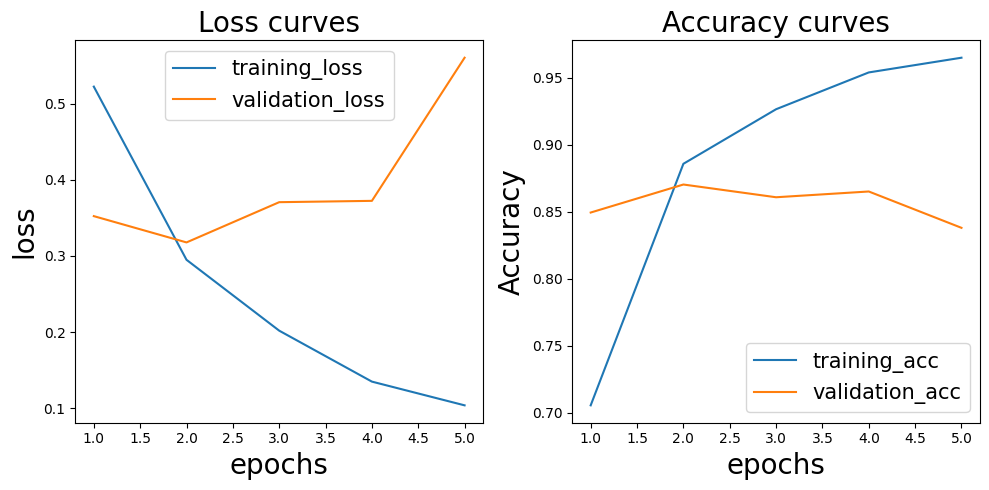

In [ ]:
def visualpara():
    train_loss=history.history['loss']
    val_loss=history.history['val_loss']

    train_accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(1,len(history.history['loss'])+1)
    plt.figure(figsize=(10,5))

    # plot loss data
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,label="training_loss")
    plt.plot(epochs,val_loss,label="validation_loss")
    plt.title("Loss curves",size=20)
    plt.xlabel('epochs',size=20)
    plt.ylabel('loss',size=20)
    plt.legend(fontsize=15);
    # plt.show()

    # plot accuracy data
    plt.subplot(1,2,2)
    plt.plot(epochs,train_accuracy,label="training_acc")
    plt.plot(epochs,val_accuracy,label="validation_acc")
    plt.title("Accuracy curves",size=20)
    plt.xlabel('epochs',size=20)
    plt.ylabel('Accuracy',size=20)
    plt.tight_layout()
    plt.legend(fontsize=15)
    
visualpara()

### Model B: CNN Model

In [ ]:
from keras.layers import Conv1D

In [ ]:
# Neural Network architecture
cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, output_dim=5, input_length=maxlen)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(32, 10, activation='relu'))
rnn_model.add(Dropout(0.2))
cnn_model.add(GlobalMaxPooling1D())
rnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 5)            795075    
                                                                 
 conv1d (Conv1D)             (None, 503, 32)           1632      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 796,740
Trainable params: 796,740
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
1250/1250 [==============================] - 104s 79ms/step - loss: 0.4336 - accuracy: 0.7914 - val_loss: 0.3090 - val_accuracy: 0.8696
Epoch 2/10
1250/1250 [==============================] - 29s 24ms/step - loss: 0.2331 - accuracy: 0.9104 - val_loss: 0.2947 - val_accuracy: 0.8775
Epoch 3/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.1416 - accuracy: 0.9517 - val_loss: 0.3265 - val_accuracy: 0.8702
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0816 - accuracy: 0.9740 - val_loss: 0.3790 - val_accuracy: 0.8678
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0432 - accuracy: 0.9880 - val_loss: 0.4417 - val_accuracy: 0.8617


In [ ]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.8617


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4417002499103546
Test Accuracy: 0.8616999983787537


In [ ]:
# extract the predicted probabilities
p_pred = cnn_model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))


# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

313/313 [==============================] - 0s 1ms/step
[0.95 1.   0.01 ... 0.01 0.13 0.67]
[1 1 0 ... 0 0 1]


In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4961
           1       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



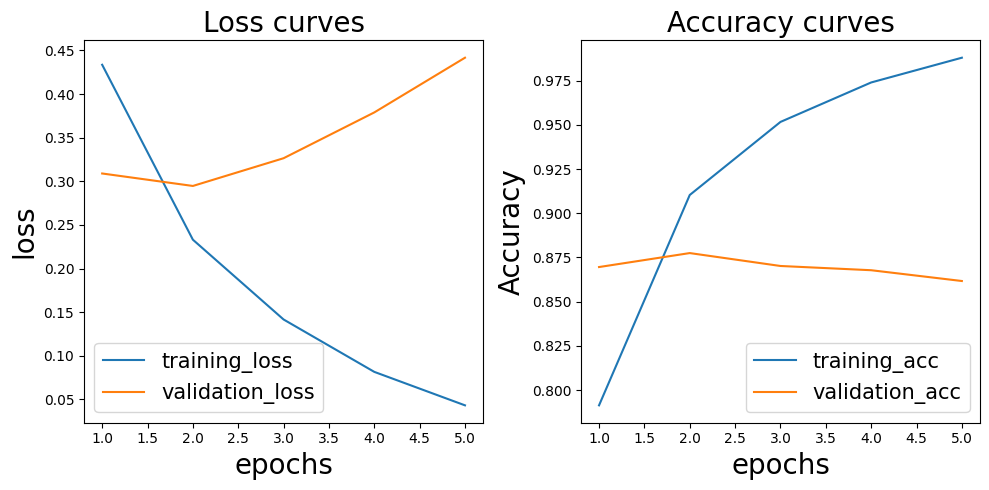

In [ ]:
visualpara()

### Model C: LSTM Model

In [ ]:
from keras.layers import LSTM

In [ ]:
# Define Network architecture
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_length, 5, input_length = maxlen))
lstm_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(10, activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))


In [ ]:
# Model compiling
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 512, 5)            795075    
                                                                 
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 800,280
Trainable params: 800,280
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Model Training

history = lstm_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
1250/1250 [==============================] - 1206s 962ms/step - loss: 0.3812 - accuracy: 0.8227 - val_loss: 0.2954 - val_accuracy: 0.8757
Epoch 2/10
1250/1250 [==============================] - 1139s 911ms/step - loss: 0.1891 - accuracy: 0.9295 - val_loss: 0.2725 - val_accuracy: 0.8868
Epoch 3/10
1250/1250 [==============================] - 1129s 903ms/step - loss: 0.1155 - accuracy: 0.9603 - val_loss: 0.3134 - val_accuracy: 0.8916
Epoch 4/10
1250/1250 [==============================] - 1120s 896ms/step - loss: 0.0784 - accuracy: 0.9726 - val_loss: 0.3538 - val_accuracy: 0.8858
Epoch 5/10
1250/1250 [==============================] - 1121s 897ms/step - loss: 0.0551 - accuracy: 0.9818 - val_loss: 0.4241 - val_accuracy: 0.8816


In [ ]:
score = lstm_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 45s 143ms/step - loss: 0.4241 - accuracy: 0.8816


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4241271913051605
Test Accuracy: 0.881600022315979


In [ ]:
# extract the predicted probabilities
p_pred = lstm_model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))


# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

313/313 [==============================] - 45s 141ms/step
[1.   1.   0.   ... 1.   0.04 0.68]
[1 1 0 ... 1 0 1]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



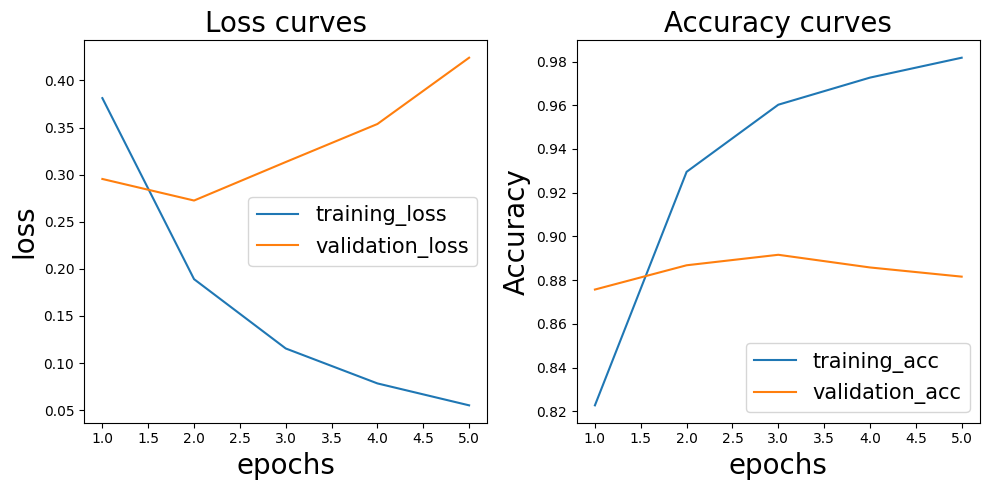

In [ ]:
visualpara()

### Model D: A DistilBERT tuned model for sentitiment analysis

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.6 MB/s eta 0:00:00


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wandb --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.2 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=1837daecc4bbcb0fd275ff4bfd59ebf1c737e994ccd5bba3c3b270024773ff26
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [ ]:
imdb_data.shape

(50000, 2)

In [ ]:
imdb_data.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode '...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


#### Import Libraries

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel, AutoModelForSequenceClassification,TrainingArguments, Trainer ,TFTrainingArguments, TFTrainer, TFDistilBertForSequenceClassification


In [ ]:
X= list(imdb_data["review"])


In [ ]:
y = imdb_data['sentiment']
#convert the sentiments to numerics of 1 and 0
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

#### Split dataset 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#### Import Library from transformer to tokenize

In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')#uncased does not differentiate between 'English' and 'english'

#### Tokenize and pad the train and test splits

In [ ]:
#Tokenize and pad the train and test data
#padding is done to make the length of the text equal
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [ ]:
#Convert the tokenzied text to slices in the form usable by the transformer model
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),y_test
))

In [ ]:
#train_dataset

In [ ]:
# #Compute metrics sample 1
# from sklearn.metrics import accuracy_score, f1_score

# def compute_metrics(pred):
#     labels = pred.label_ids
#     preds = pred.predictions.argmax(-1)
#     f1 = f1_score(labels, preds, average="weighted")
#     acc = accuracy_score(labels, preds)
#     return {"accuracy": acc, "f1": f1}

#### Define training arguments

In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs. Same as the previous models with early stopping
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.1,                # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,               # logging steps
    eval_steps = 10,                 # evaluation steps
   
    
)

In [ ]:
with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_19', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

#### Define the metrics

In [1]:
#!pip install datasets

In [ ]:
import numpy as np
from datasets import load_metric
from sklearn.metrics import precision_recall_fscore_support
 
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")
  
   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
   return {"accuracy": accuracy,
           "f1": f1,
           'precision': precision,
           'recall': recall}

#### Define Trainer

In [ ]:
trainer = TFTrainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,             # evaluation dataset
    compute_metrics=compute_metrics,
    

)


/usr/local/lib/python3.9/dist-packages/transformers/trainer_tf.py:118: FutureWarning: The class `TFTrainer` is deprecated and will be removed in version 5 of Transformers. We recommend using native Keras instead, by calling methods like `fit()` and `predict()` directly on the model object. Detailed examples of the Keras style can be found in our examples at https://github.com/huggingface/transformers/tree/main/examples/tensorflow
  warnings.warn(


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
#call the trainer train method
trainer.train()

#### Model Evaluation

In [ ]:
y_pred= trainer.predict(test_dataset)

<ipython-input-41-757ae5d6bf95>:6: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


In [ ]:
print(y_pred)

PredictionOutput(predictions=array([[-4.037775 ,  3.6930964],
       [ 4.205509 , -4.719807 ],
       [ 2.045412 , -2.503082 ],
       ...,
       [-3.9783573,  3.6453445],
       [-2.0037184,  1.8320062],
       [ 3.9075716, -4.503689 ]], dtype=float32), label_ids=array([1, 0, 0, ..., 1, 1, 0]), metrics={'eval_loss': 0.3118844970703125, 'eval_accuracy': 0.9337, 'eval_f1': 0.9332930878357983})


In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_loss': 0.3222536865234375, 'eval_accuracy': 0.9199, 'eval_f1': 0.9195217522355069, 'eval_precision': 0.917401764234162, 'eval_recall': 0.9216515609264854}


### End

In [ ]:
#test on a record
from sklearn.metrics import classification_report
target_names = ['Positive','Negative']
print(classification_report(y_test,trainer.predict(test_dataset)[1],
                           target_names=target_names))

              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00      5035
    Negative       1.00      1.00      1.00      4965

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

